In [1]:
import pickle
import numpy as np

In [3]:
with open('train_qa.txt','rb') as f:
    train_data=pickle.load(f)

In [4]:
with open('test_qa.txt','rb') as f:
    test_data=pickle.load(f)

In [5]:
type(test_data)

list

In [6]:
type(train_data)

list

In [7]:
len(train_data)

10000

In [8]:
len(test_data)

1000

In [9]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [11]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [12]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [13]:
train_data[0][2]

'no'

In [14]:
all_data=test_data + train_data

In [15]:
len(all_data)

11000

In [17]:
vocab = set()

for question,story,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [18]:
vocab.add('yes')

In [19]:
vocab.add('no')

In [20]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [21]:
vocab_len=len(vocab)+1

In [24]:
vocab_len

38

In [26]:
#longest story
all_story_lens = [len(data[0]) for data in all_data]

In [27]:
max_story_len= max(all_story_lens)

In [28]:
max_story_len

156

In [29]:
all_question_lens = [len(data[1]) for data in all_data]

In [30]:
max_question_len = max(all_question_lens)

In [31]:
max_question_len

6

In [35]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [36]:
tokenizer=Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [37]:
tokenizer.word_index

{'.': 19,
 '?': 6,
 'apple': 28,
 'back': 14,
 'bathroom': 23,
 'bedroom': 34,
 'daniel': 17,
 'discarded': 9,
 'down': 10,
 'dropped': 36,
 'football': 33,
 'garden': 18,
 'got': 35,
 'grabbed': 24,
 'hallway': 32,
 'in': 29,
 'is': 4,
 'john': 27,
 'journeyed': 26,
 'kitchen': 31,
 'left': 12,
 'mary': 8,
 'milk': 22,
 'moved': 1,
 'no': 3,
 'office': 37,
 'picked': 21,
 'put': 16,
 'sandra': 5,
 'the': 20,
 'there': 13,
 'to': 2,
 'took': 7,
 'travelled': 15,
 'up': 30,
 'went': 11,
 'yes': 25}

In [38]:
train_story_text = []
train_question_text = []
train_answers = []

In [39]:
for question,story,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [40]:
train_story_text

[['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Daniel', 'in', 'the', 'office', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'garden', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Mary', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', '

In [41]:
train_story_seq=tokenizer.texts_to_sequences(train_story_text)

In [114]:
train_story_seq

[[4, 5, 29, 20, 32, 6],
 [4, 17, 29, 20, 23, 6],
 [4, 17, 29, 20, 37, 6],
 [4, 17, 29, 20, 34, 6],
 [4, 17, 29, 20, 34, 6],
 [4, 8, 29, 20, 34, 6],
 [4, 5, 29, 20, 37, 6],
 [4, 5, 29, 20, 23, 6],
 [4, 5, 29, 20, 23, 6],
 [4, 8, 29, 20, 31, 6],
 [4, 5, 29, 20, 37, 6],
 [4, 8, 29, 20, 32, 6],
 [4, 8, 29, 20, 32, 6],
 [4, 8, 29, 20, 32, 6],
 [4, 8, 29, 20, 18, 6],
 [4, 5, 29, 20, 37, 6],
 [4, 5, 29, 20, 23, 6],
 [4, 5, 29, 20, 31, 6],
 [4, 8, 29, 20, 34, 6],
 [4, 8, 29, 20, 31, 6],
 [4, 17, 29, 20, 34, 6],
 [4, 5, 29, 20, 23, 6],
 [4, 5, 29, 20, 34, 6],
 [4, 17, 29, 20, 37, 6],
 [4, 17, 29, 20, 31, 6],
 [4, 5, 29, 20, 23, 6],
 [4, 5, 29, 20, 37, 6],
 [4, 27, 29, 20, 37, 6],
 [4, 5, 29, 20, 37, 6],
 [4, 5, 29, 20, 32, 6],
 [4, 27, 29, 20, 23, 6],
 [4, 27, 29, 20, 34, 6],
 [4, 8, 29, 20, 32, 6],
 [4, 27, 29, 20, 34, 6],
 [4, 17, 29, 20, 23, 6],
 [4, 5, 29, 20, 32, 6],
 [4, 8, 29, 20, 31, 6],
 [4, 8, 29, 20, 23, 6],
 [4, 5, 29, 20, 37, 6],
 [4, 8, 29, 20, 23, 6],
 [4, 5, 29, 20, 18, 6],
 [4,

In [42]:
len(train_story_seq)

10000

In [44]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_question_len):
    #stories
    X=[]
    #questions
    Xq=[]
    #Y correct answer (yes/no)
    Y=[]
    
    for question,story,answer in data:
        #for each story
        #[23,14,....]
        x=[word_index[word.lower()] for word in story]
        xq=[word_index[word.lower()] for word in question]
        
        y=np.zeros(len(word_index)+1)
        
        y[word_index[answer]]=1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return(pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))

In [47]:
inputs_train,queries_train,answers_train=vectorize_stories(train_data)

In [49]:
inputs_test,queries_test,answers_test=vectorize_stories(test_data)

In [50]:
tokenizer.word_index['yes']

25

In [51]:
tokenizer.word_index['no']

3

In [52]:
inputs_test

array([[ 0,  0,  0, ..., 20, 31,  6],
       [ 0,  0,  0, ..., 20, 31,  6],
       [ 0,  0,  0, ..., 20, 18,  6],
       ...,
       [ 0,  0,  0, ..., 20, 34,  6],
       [ 0,  0,  0, ..., 20, 18,  6],
       [ 0,  0,  0, ..., 20, 18,  6]])

In [53]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
sum(answers_test)

array([  0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [55]:
from keras.models import Sequential,Model

In [56]:
from keras.layers.embeddings import Embedding

In [57]:
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [58]:
#placeholder shape=(max_story_len,batch_size)
input_sequence=Input((max_story_len,))
question=Input((max_question_len,))

#vocab_len
vocab_size = len(vocab)+1

In [62]:
#input encoder m
input_encoder_m=Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

#output
#(samples,story_maxlen,embedding_dim)

In [63]:
#input encoder c
input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

#output
#(samples,story_maxlen,max_question_len)

In [66]:
question_encoder=Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

#(samples,story_maxlen,max_question_len)

In [67]:
#encoded <----- encoder(input)
input_encoded_m=input_encoder_m(input_sequence)
input_encoded_c=input_encoder_c(input_sequence)
question_encoded=question_encoder(question)

In [68]:
match=dot([input_encoded_m,question_encoded],axes=(2,2))
match=Activation('softmax')(match)

In [69]:
response=add([match,input_encoded_c])
response=Permute((2,1))(response)

In [70]:
answer=concatenate([response,question_encoded])

In [71]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(None, 6, 220) dtype=float32>

In [73]:
answer=LSTM(32)(answer)

In [75]:
answer=Dropout(0.5)(answer)
answer=Dense(vocab_size)(answer) # (samples,vocab_size) #yes/no 0000

In [76]:
answer=Activation('softmax')(answer)

In [77]:
model=Model([input_sequence,question],answer)

In [78]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [79]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_4 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_8 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
____________________________________________________________________________________________

In [81]:
history=model.fit([inputs_train,queries_train],answers_train,batch_size=32,epochs=120,validation_data=([inputs_test,queries_test],answers_test))

C:\Users\admin\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10000 samples, validate on 1000 samples
Epoch 1/120
10000/10000 [==============================] - 7s 709us/step - loss: 0.8823 - accuracy: 0.4978 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 2/120
10000/10000 [==============================] - 6s 603us/step - loss: 0.7066 - accuracy: 0.4918 - val_loss: 0.6950 - val_accuracy: 0.5030
Epoch 3/120
10000/10000 [==============================] - 6s 610us/step - loss: 0.6979 - accuracy: 0.4977 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 4/120
10000/10000 [==============================] - 6s 614us/step - loss: 0.6952 - accuracy: 0.5073 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 5/120
10000/10000 [==============================] - 6s 614us/step - loss: 0.6941 - accuracy: 0.5091 - val_loss: 0.6950 - val_accuracy: 0.4970
Epoch 6/120
10000/10000 [==============================] - 6s 613us/step - loss: 0.6953 - accuracy: 0.4970 - val_loss: 0.6944 - val_accuracy: 0.4970
Epoch 7/120
10000/10000 [==============================] 

10000/10000 [==============================] - 6s 590us/step - loss: 0.4982 - accuracy: 0.6953 - val_loss: 0.4660 - val_accuracy: 0.6860
Epoch 110/120
10000/10000 [==============================] - 6s 597us/step - loss: 0.4869 - accuracy: 0.6960 - val_loss: 0.4642 - val_accuracy: 0.6830
Epoch 111/120
10000/10000 [==============================] - 6s 587us/step - loss: 0.4902 - accuracy: 0.6930 - val_loss: 0.4646 - val_accuracy: 0.6990
Epoch 112/120
10000/10000 [==============================] - 6s 589us/step - loss: 0.4903 - accuracy: 0.6971 - val_loss: 0.4666 - val_accuracy: 0.7020
Epoch 113/120
10000/10000 [==============================] - 6s 590us/step - loss: 0.4834 - accuracy: 0.7007 - val_loss: 0.4735 - val_accuracy: 0.6990
Epoch 114/120
10000/10000 [==============================] - 6s 601us/step - loss: 0.4918 - accuracy: 0.6965 - val_loss: 0.4657 - val_accuracy: 0.6780
Epoch 115/120
10000/10000 [==============================] - 6s 594us/step - loss: 0.4842 - accuracy: 0.6970

In [82]:
filename='chatbots_120_epochs.h5'
model.save(filename)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


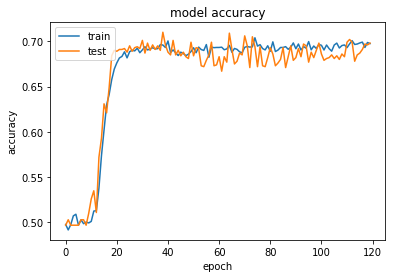

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [85]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [106]:
my_story="John left the kitchen . Sandra dropped football in garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'football',
 'in',
 'garden',
 '.']

In [107]:
my_question="Is the football in the garden ?"
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [110]:
mydata=[(my_story.split(),my_question.split(),'yes')]

In [111]:
my_story,my_ques,my_ans=vectorize_stories(mydata)

In [112]:
pred_results=model.predict(([my_story,my_ques]))

In [113]:
#generate prediction from model
val_max=np.argmax(pred_results[0])

for key,val in tokenizer.word_index.items():
    if val==val_max:
        k=key

print("predicted answer is ",k)
print("probability of certainty was ",pred_results[0][val_max])

predicted answer is  yes
probability of certainty was  0.9382927
